In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Getting the current working directory
current_working_directory = os.getcwd()

# Printing the current working directory
print("Current Working Directory:", current_working_directory)

Current Working Directory: /content


In [ ]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = '/content/FrameData_remote_rendering_final.csv'

df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the DataFrame
print(df.head())

   Frame Count               Start Time End Time
0          NaN                 New Text      NaN
1          0.0  2024-01-26 17:01:45.890      NaN
2          1.0  2024-01-26 17:01:46.970      NaN
3          2.0  2024-01-26 17:01:47.009      NaN
4          3.0  2024-01-26 17:01:47.037      NaN


In [ ]:
print("Column Names:", df.columns)


Column Names: Index(['Frame Count', 'Start Time', 'End Time'], dtype='object')


In [ ]:
# Remove the first row
df = df.drop(df.index[0])

# Display the DataFrame to verify the first row is removed
print(df.head())

   Frame Count               Start Time End Time
1          0.0  2024-01-26 17:01:45.890      NaN
2          1.0  2024-01-26 17:01:46.970      NaN
3          2.0  2024-01-26 17:01:47.009      NaN
4          3.0  2024-01-26 17:01:47.037      NaN
5          4.0  2024-01-26 17:01:47.075      NaN


In [ ]:
# Remove rows where 'End Time' is missing
df.dropna(subset=['End Time'], inplace=True)

# Check the result
print(df.head())

     Frame Count               Start Time                 End Time
456        455.0  2024-01-26 17:02:06.738  2024-01-26 17:02:06.765
466        465.0  2024-01-26 17:02:07.070  2024-01-26 17:02:07.148
506        505.0  2024-01-26 17:02:08.399  2024-01-26 17:02:08.464
534        533.0  2024-01-26 17:02:09.329  2024-01-26 17:02:09.396
540        539.0  2024-01-26 17:02:09.537  2024-01-26 17:02:09.596


In [ ]:
# Convert 'Start Time' and 'End Time' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

# Calculate latency in milliseconds and store in a new column
df['Latency'] = (df['End Time'] - df['Start Time']).dt.total_seconds()

# Display the DataFrame to verify the results
print(df.head())

     Frame Count              Start Time                End Time  Latency
456        455.0 2024-01-26 17:02:06.738 2024-01-26 17:02:06.765    0.027
466        465.0 2024-01-26 17:02:07.070 2024-01-26 17:02:07.148    0.078
506        505.0 2024-01-26 17:02:08.399 2024-01-26 17:02:08.464    0.065
534        533.0 2024-01-26 17:02:09.329 2024-01-26 17:02:09.396    0.067
540        539.0 2024-01-26 17:02:09.537 2024-01-26 17:02:09.596    0.059


In [ ]:
print(df)


      Frame Count              Start Time                End Time  Latency
456         455.0 2024-01-26 17:02:06.738 2024-01-26 17:02:06.765    0.027
466         465.0 2024-01-26 17:02:07.070 2024-01-26 17:02:07.148    0.078
506         505.0 2024-01-26 17:02:08.399 2024-01-26 17:02:08.464    0.065
534         533.0 2024-01-26 17:02:09.329 2024-01-26 17:02:09.396    0.067
540         539.0 2024-01-26 17:02:09.537 2024-01-26 17:02:09.596    0.059
562         561.0 2024-01-26 17:02:10.260 2024-01-26 17:02:10.345    0.085
569         568.0 2024-01-26 17:02:10.494 2024-01-26 17:02:10.579    0.085
583         582.0 2024-01-26 17:02:10.971 2024-01-26 17:02:11.045    0.074
590         589.0 2024-01-26 17:02:11.204 2024-01-26 17:02:11.278    0.074
620         619.0 2024-01-26 17:02:12.198 2024-01-26 17:02:12.260    0.062
659         658.0 2024-01-26 17:02:13.501 2024-01-26 17:02:13.576    0.075
686         685.0 2024-01-26 17:02:14.399 2024-01-26 17:02:14.459    0.060
729         728.0 2024-01

In [ ]:
# Convert 'Start Time' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Calculate the base time (start of your interval)
base_time = pd.to_datetime('2024-01-26 17:02:06')

# Calculate the elapsed time in seconds since the base time
df['Adjusted Time'] = (df['Start Time'] - base_time).dt.total_seconds()

# Convert 'Latency' to milliseconds
df['Latency'] = df['Latency'] * 1000

average_latency = df['Latency'].mean()

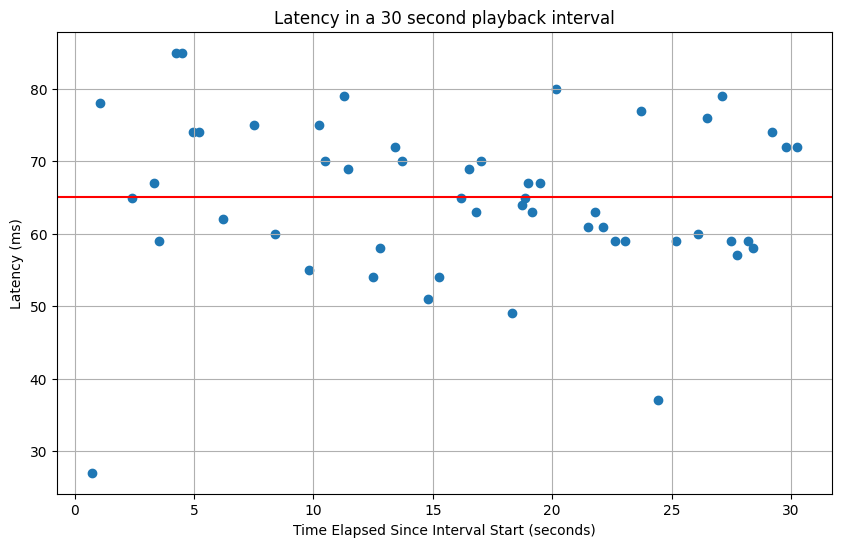

      Frame Count              Start Time                End Time  Latency  \
456         455.0 2024-01-26 17:02:06.738 2024-01-26 17:02:06.765     27.0   
466         465.0 2024-01-26 17:02:07.070 2024-01-26 17:02:07.148     78.0   
506         505.0 2024-01-26 17:02:08.399 2024-01-26 17:02:08.464     65.0   
534         533.0 2024-01-26 17:02:09.329 2024-01-26 17:02:09.396     67.0   
540         539.0 2024-01-26 17:02:09.537 2024-01-26 17:02:09.596     59.0   
562         561.0 2024-01-26 17:02:10.260 2024-01-26 17:02:10.345     85.0   
569         568.0 2024-01-26 17:02:10.494 2024-01-26 17:02:10.579     85.0   
583         582.0 2024-01-26 17:02:10.971 2024-01-26 17:02:11.045     74.0   
590         589.0 2024-01-26 17:02:11.204 2024-01-26 17:02:11.278     74.0   
620         619.0 2024-01-26 17:02:12.198 2024-01-26 17:02:12.260     62.0   
659         658.0 2024-01-26 17:02:13.501 2024-01-26 17:02:13.576     75.0   
686         685.0 2024-01-26 17:02:14.399 2024-01-26 17:02:14.45

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Adjusted Time'], df['Latency'], marker='o')
plt.axhline(y=average_latency, color='r', linestyle='-', label='Average Latency')

plt.xlabel('Time Elapsed Since Interval Start (seconds)')
plt.ylabel('Latency (ms)')
plt.title('Latency in a 30 second playback interval')
plt.grid(True)
plt.show()

print(df)

In [ ]:
# Calculate median and 0.75 quantile for Latency to provide insights into the distribution of latency values
median_latency = df['Latency'].median()
quantile_75_latency = df['Latency'].quantile(0.75)

print("Median Latency (ms):", median_latency)
print("0.75 Quantile of Latency (ms):", quantile_75_latency)

Median Latency (ms): 65.0
0.75 Quantile of Latency (ms): 72.5


In [ ]:
df['Latency'].describe()

count    52.000000
mean     65.038462
std      10.904148
min      27.000000
25%      59.000000
50%      65.000000
75%      72.500000
max      85.000000
Name: Latency, dtype: float64

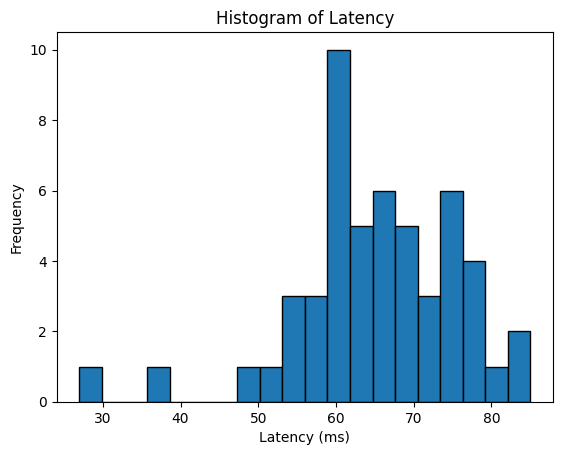

In [ ]:
plt.hist(df['Latency'], bins=20, edgecolor='black')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Latency')
plt.show()

In [ ]:
average_latency_webrtc = 70.064516  # in ms
average_latency_webtransport = 65.03  # in ms

# Calculate the difference in latency
latency_difference = average_latency_webrtc - average_latency_webtransport

# Calculate the percentage improvement
percentage_improvement = (latency_difference / average_latency_webrtc) * 100

print(f"WebTransport was faster than WebRTC by: {latency_difference:.2f} ms")
print(f"This is a {percentage_improvement:.2f}% improvement.")

WebTransport was faster than WebRTC by: 5.03 ms
This is a 7.19% improvement.


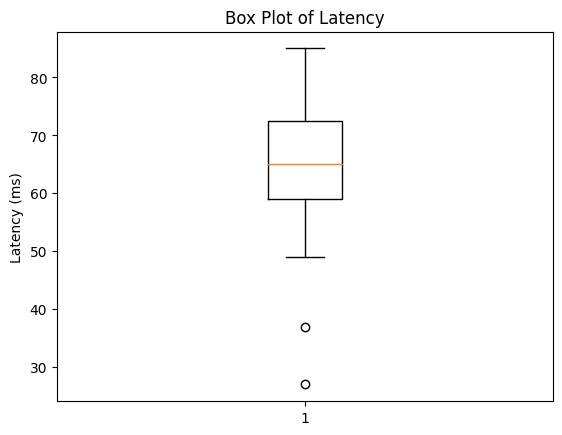

In [ ]:
plt.boxplot(df['Latency'])
plt.ylabel('Latency (ms)')
plt.title('Box Plot of Latency')
plt.show()

In [ ]:
#webrtc data for comparison

# Replace 'your_file.csv' with the path to your CSV file
file_path_w = '/content/FrameData_webrtc_results_remote_rendering.csv'

df_webrtc = pd.read_csv(file_path_w, delimiter=';')

# Display the first few rows of the DataFrame
print(df_webrtc.head())

   Frame Count                Start Time End Time
0            0   2024-01-15 22:42:50.711      NaN
1            1   2024-01-15 22:42:50.711      NaN
2            2   2024-01-15 22:42:52.704      NaN
3            3   2024-01-15 22:42:52.787      NaN
4            4   2024-01-15 22:42:52.808      NaN


In [ ]:
# Remove rows where 'End Time' is missing
df_webrtc.dropna(subset=['End Time'], inplace=True)

# Check the result
print(df_webrtc.head())


      Frame Count               Start Time                 End Time
941           941  2024-01-15 22:43:05.128  2024-01-15 22:43:05.196
944           944  2024-01-15 22:43:05.170  2024-01-15 22:43:05.229
954           954  2024-01-15 22:43:05.300  2024-01-15 22:43:05.363
964           964  2024-01-15 22:43:05.426  2024-01-15 22:43:05.497
1009         1009  2024-01-15 22:43:06.028  2024-01-15 22:43:06.096


In [ ]:

# Convert 'Start Time' and 'End Time' to datetime
df_webrtc['Start Time'] = pd.to_datetime(df_webrtc['Start Time'])
df_webrtc['End Time'] = pd.to_datetime(df_webrtc['End Time'])

# Calculate latency in milliseconds and store in a new column
df_webrtc['Latency'] = (df_webrtc['End Time'] - df_webrtc['Start Time']).dt.total_seconds()

# Display the DataFrame to verify the results
print(df_webrtc.head())

      Frame Count              Start Time                End Time  Latency
941           941 2024-01-15 22:43:05.128 2024-01-15 22:43:05.196    0.068
944           944 2024-01-15 22:43:05.170 2024-01-15 22:43:05.229    0.059
954           954 2024-01-15 22:43:05.300 2024-01-15 22:43:05.363    0.063
964           964 2024-01-15 22:43:05.426 2024-01-15 22:43:05.497    0.071
1009         1009 2024-01-15 22:43:06.028 2024-01-15 22:43:06.096    0.068


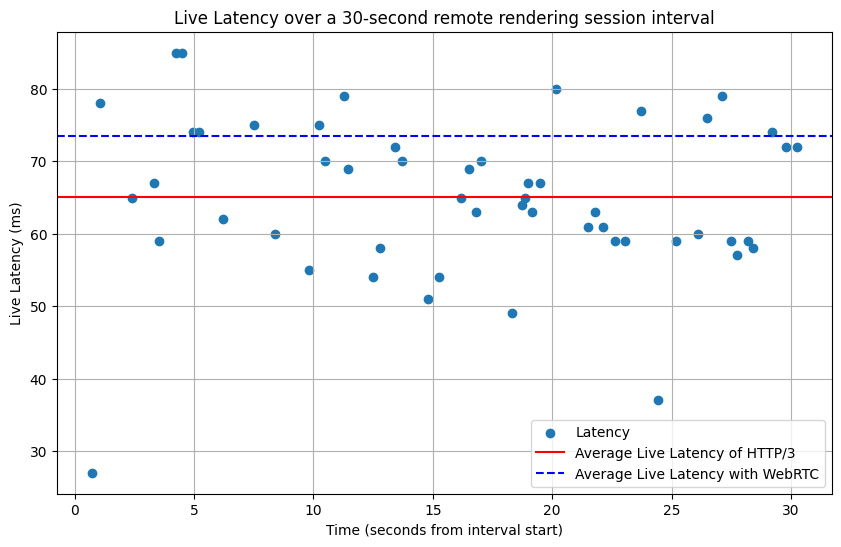

In [ ]:
# Plotting h3 and webrtc in one plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Adjusted Time'], df['Latency'], marker='o', label='Latency')
plt.axhline(y=average_latency, color='r', linestyle='-', label='Average Live Latency of HTTP/3')
plt.axhline(y=df_webrtc['Latency'].mean()*1000 , color='b', linestyle='--', label='Average Live Latency with WebRTC')
plt.xlabel('Time (seconds from interval start)')
plt.ylabel('Live Latency (ms)')
plt.title('Live Latency over a 30-second remote rendering session interval')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
df_webrtc['Latency'].mean()*1000

73.5